In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import itertools
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/house_alldata.csv')
df.head()

,Address,City,Price,Lot size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden
0,Vlasserslaan 21,Ulrum,215000,101.0,1976,Bestaande bouw,"Eengezinswoning, geschakelde 2-onder-1-kapwoning",Samengesteld dak bedekt met bitumineuze dakbed...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen en een zolder,B,"Aan rustige weg, in woonwijk en vrij uitzicht",Achtertuin en voortuin
1,Van Asch van Wijckskade 9,Utrecht,895000,140.0,1935,Bestaande bouw,"Grachtenpand, tussenwoning",Zadeldak,4 kamers (2 slaapkamers),1 badkamer en 1 apart toilet,4 woonlagen,B,NaN,Patio/atrium
2,De Fuut 35,Almelo,225000,97.0,1983,Bestaande bouw,"Eengezinswoning, tussenwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,C,Aan rustige weg en in woonwijk,Achtertuin en voortuin
3,Joos Banckersplantsoen 15 + PP,Amsterdam,875000,129.0,2003,Bestaande bouw,NaN,Plat dak bedekt met bitumineuze dakbedekking,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,1 woonlaag,B,"Aan park, aan rustige weg, aan vaarwater, aan ...",NaN
4,De Sitterlaan 17,Leiden,745000,167.0,1936,Bestaande bouw,"Herenhuis, hoekwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),3 badkamers en 1 apart toilet,3 woonlagen en een vliering,D,"In centrum, in woonwijk en vrij uitzicht",Zonneterras


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9916 entries, 0 to 9915
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        9916 non-null   object 
 1   City           9916 non-null   object 
 2   Price          9916 non-null   object 
 3   Lot size (m2)  9916 non-null   float64
 4   Build year     9748 non-null   object 
 5   Build type     9904 non-null   object 
 6   House type     7882 non-null   object 
 7   Roof           9584 non-null   object 
 8   Rooms          9905 non-null   object 
 9   Toilet         9905 non-null   object 
 10  Floors         9905 non-null   object 
 11  Energy label   9904 non-null   object 
 12  Position       9377 non-null   object 
 13  Garden         8242 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.1+ MB


In [ ]:
# Afișarea formei setului de date (numărul de rânduri și coloane)
print("Forma setului de date:", df.shape)

# Afișarea primelor 5 rânduri din setul de date
print("Primele 5 rânduri:")
print(df.head())

# Afișarea ultimelor 5 rânduri din setul de date
print("Ultimele 5 rânduri:")
print(df.tail())

# Afișarea informațiilor despre setul de date
print("Informații despre setul de date:")
df.info()

# Calculul și afișarea numărului de valori unice în fiecare coloană
print("Numărul de valori unice în fiecare coloană:")
print(df.nunique())

# Calculul numărului total de valori lipsă din fiecare coloană
print("Numărul total de valori lipsă în fiecare coloană:")
print(df.isnull().sum())

# Calculul procentului de valori lipsă în fiecare coloană
print("Procentul de valori lipsă în fiecare coloană:")
print((df.isnull().sum()/(len(df)))*100)


Forma setului de date: (9916, 14)
Primele 5 rânduri:
                          Address  City   Price  Lot size (m2)  Build year  \
0                 Vlasserslaan 21  1124  215000          101.0      1976.0   
1       Van Asch van Wijckskade 9  1129  895000          140.0      1935.0   
2                      De Fuut 35    35  225000           97.0      1983.0   
3  Joos Banckersplantsoen 15 + PP    50  875000          129.0      2003.0   
4                De Sitterlaan 17   633  745000          167.0      1936.0   

   Build type  House type  Roof  Rooms  Toilet Floors  Energy label  Position  \
0         0.0           0     0    4.0     1.0    2.5           5.0         0   
1         0.0           1     1    4.0     1.0      4           5.0         1   
2         0.0           2     2    5.0     1.0      3           6.0         2   
3         0.0           3     3    4.0     1.0      1           5.0         3   
4         0.0           4     2    5.0     3.0    3.5           7.0      

Procentul de valori lipsă în fiecare coloană:
Address          0.000000
City             0.000000
Price            0.181525
Lot size (m2)    0.000000
Build year       1.744655
Build type       0.171440
House type       0.000000
Roof             0.000000
Rooms            0.161355
Toilet           0.110932
Floors           0.151271
Energy label     0.171440
Position         0.000000
Garden           0.000000
dtype: float64


<ipython-input-47-df7532fd9c26>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Missing Percentage', data=missing_df, palette="coolwarm")


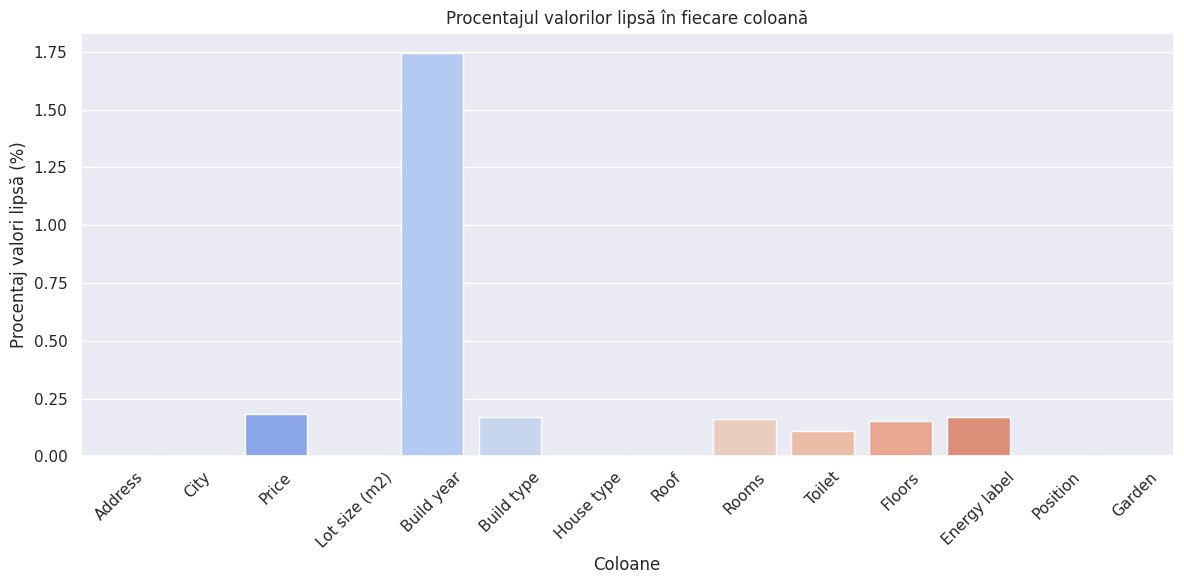

In [ ]:
# Procentul de valori lipsă
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Procentul de valori lipsă în fiecare coloană:")
print(missing_percentage)

# Generarea diagramei pentru procentajul valorilor lipsă
plt.figure(figsize=(12, 6))

# Crearea unui DataFrame din procentajul de valori lipsă
missing_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Plotarea
sns.barplot(x='Column', y='Missing Percentage', data=missing_df, palette="coolwarm")

plt.title('Procentajul valorilor lipsă în fiecare coloană')
plt.xlabel('Coloane')
plt.ylabel('Procentaj valori lipsă (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', lw=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Find unique values and make dict
def unique_vals(column):
    """
    Function that creates a dictionary of unique values and corresponding unique numerical values.

    Input: column - Pandas DataSeries of 1 column
    Output: value_dict - Dictionary of unique column values and unique numerical values
    """
    unique_values = column.unique()
    vals = np.arange(0,len(unique_values))
    value_dict = dict(zip(unique_values, vals))
    return value_dict

    # Remove characters

df['Price'] = df['Price'].str.replace("€ ","")
df['Price'] = df['Price'].str.replace(".","")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Exemplu: Codificăm 'Build type'
df['City'] = LabelEncoder().fit_transform(df['City'])

In [ ]:
# Turn build_type into integer
def price_int(price):
    if price == 'Prijs op aanvraag':
        out = np.nan
    elif 'von' in price:
        out = price.split(' von')[0]
    else:
        out = price
    return out

df['Price'] = df['Price'].apply(lambda row : price_int(row))

In [ ]:
import numpy as np
import math

def build_year_float(build_year):
    # Convert to string to handle cases where input might not be a string
    build_year = str(build_year)
    if 'Voor' in build_year:
        year = build_year.split(' ')
        out = float(year[1]) - 1
    elif 'Na' in build_year:
        year = build_year.split(' ')
        out = float(year[1]) + 1
    elif build_year.isdigit():  # Check if the string is numeric
        out = float(build_year)
    elif build_year == 'Bestaande bouw':  # Specific case for non-numeric value
        out = np.nan
    else:
        try:
            out = float(build_year)
        except ValueError:  # Catch cases where conversion fails
            out = np.nan
    return out

df['Build year'] = df['Build year'].apply(build_year_float)


In [ ]:
def build_type_int(build_type):
    if pd.isna(build_type):  # Check for NaN
        out = np.nan
    elif build_type == 'Bestaande bouw':
        out = 0
    elif build_type == 'Nieuwbouw':
        out = 1
    else:
        out = np.nan  # Assign NaN for unexpected categories
    return out

df['Build type'] = df['Build type'].apply(build_type_int)


In [ ]:
# Find unique values for House type
house_type_dict = unique_vals(df['House type'])

# Turn house_type into integer
def house_type_int(house_type):
    out = house_type_dict[house_type]
    return out

df['House type'] = df['House type'].apply(lambda row : house_type_int(row))

In [ ]:
roof_dict = unique_vals(df['Roof'])

# Turn house_type into integer
def roof_int(roof):
    out = roof_dict[roof]
    return out

df['Roof'] = df['Roof'].apply(lambda row : roof_int(row))



In [ ]:
def room_int(rooms):
    if pd.isna(rooms):  # Check for NaN
        return np.nan
    room_nr = rooms.split(' ')  # Split the string
    if room_nr[0].isdigit():  # Check if the first part is a digit
        return int(room_nr[0])  # Convert to integer
    else:
        return np.nan  # Return NaN for invalid entries

# Apply the function
df['Rooms'] = df['Rooms'].apply(room_int)


In [ ]:
def toilet_int(toilets):
    if pd.isna(toilets):  # Check for NaN
        return np.nan
    toilet_nr = toilets.split(' ')  # Split the string
    # Extract the first numeric value
    for word in toilet_nr:
        if word.isdigit():  # Check if the word is a digit
            return int(word)  # Convert to integer and return
    return np.nan  # Return NaN if no number is found

# Apply the function to the 'Toilet' column
df['Toilet'] = df['Toilet'].apply(toilet_int)


In [ ]:
def extract_floor_nr(data):
    if pd.isna(data):  # Check for NaN
        return np.nan
    words = data.split(' ')

    # Check if the first word is a numeric value
    if words[0].isdigit():
        if len(words) > 2:  # Handle cases with more than 2 words (like "1e verdieping")
            out = str(int(words[0]) + 0.5)  # Add 0.5 for floor with an extra description (e.g., "1.5")
        else:
            out = words[0]  # Just return the floor number if there's no extra description
    else:
        out = np.nan  # If the first word is not a number, return NaN
    return out

# Apply the function to the 'Floors' column
df['Floors'] = df['Floors'].apply(extract_floor_nr)


In [ ]:
energy_dict = {'A++++': 0,
               'A+++': 1,
               'A++': 2,
               'A+': 3,
               'A': 4,
               'B': 5,
               'C': 6,
               'D': 7,
               'E': 8,
               'F': 9,
               'G': 10,
               'Niet verplicht': -1}

def energy_int(label):
    if pd.isna(label):  # Check for NaN
        return np.nan
    else:
        return energy_dict.get(label, np.nan)  # Use .get() to handle unexpected labels safely

df['Energy label'] = df['Energy label'].apply(energy_int)

In [ ]:
# Turn position into int
position_dict = unique_vals(df['Position'])

def position_int(position):
    out = position_dict[position]
    return out

df['Position'] = df['Position'].apply(lambda row : position_int(row))

In [ ]:
garden_dict = unique_vals(df['Garden'])

def garden_int(garden):
    out = garden_dict[garden]
    return out

df['Garden'] = df['Garden'].apply(lambda row : garden_int(row))

In [ ]:
df = df.drop(columns=['Build type', 'City', 'Energy label','Floors'])

In [ ]:
df.head()

,Address,Price,Lot size (m2),Build year,House type,Roof,Rooms,Toilet,Position,Garden
0,Vlasserslaan 21,215000,101.0,1976.0,0,0,4.0,1.0,0,0
1,Van Asch van Wijckskade 9,895000,140.0,1935.0,1,1,4.0,1.0,1,1
2,De Fuut 35,225000,97.0,1983.0,2,2,5.0,1.0,2,0
3,Joos Banckersplantsoen 15 + PP,875000,129.0,2003.0,3,3,4.0,1.0,3,2
4,De Sitterlaan 17,745000,167.0,1936.0,4,2,5.0,3.0,4,3


In [ ]:
df = df.dropna()

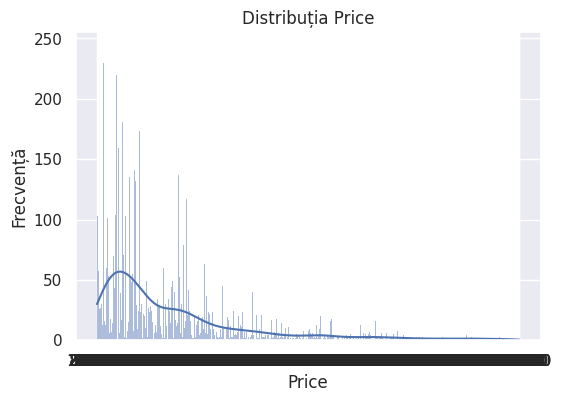

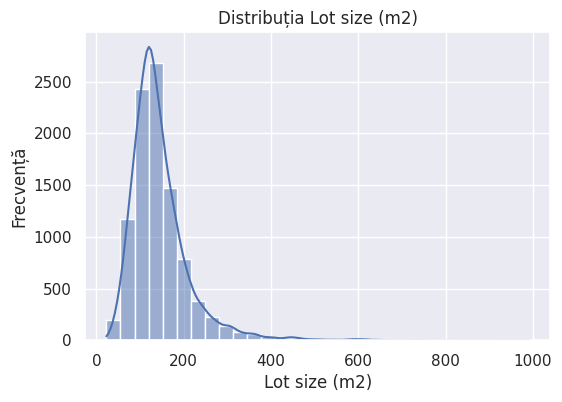

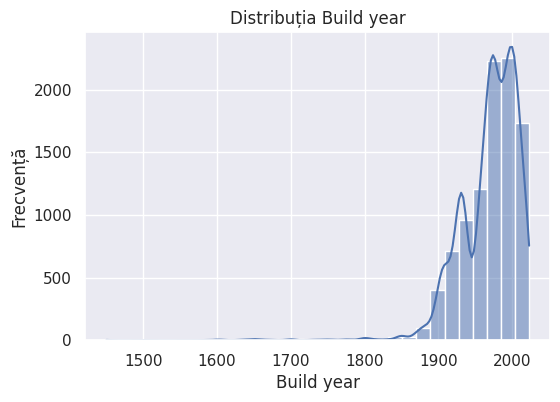

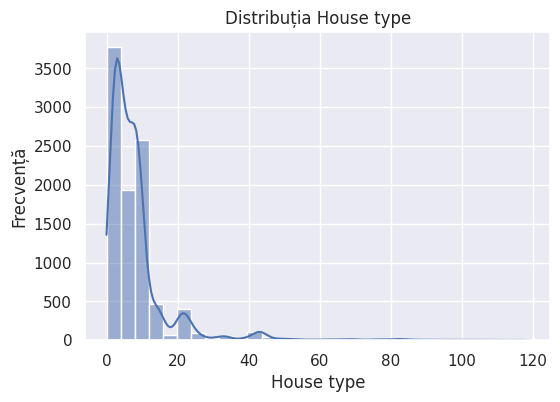

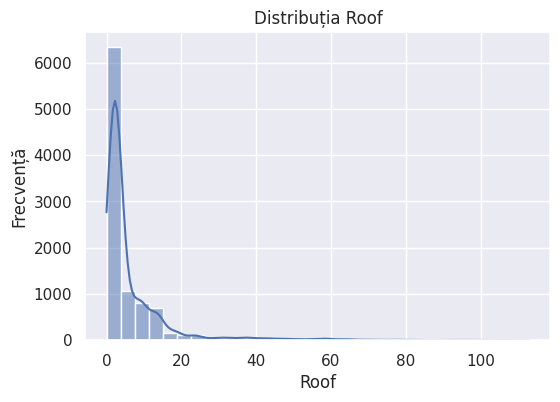

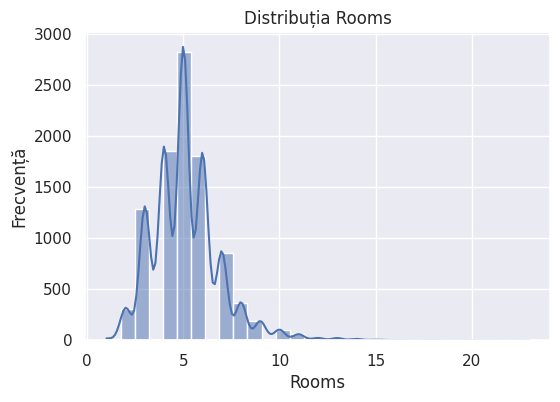

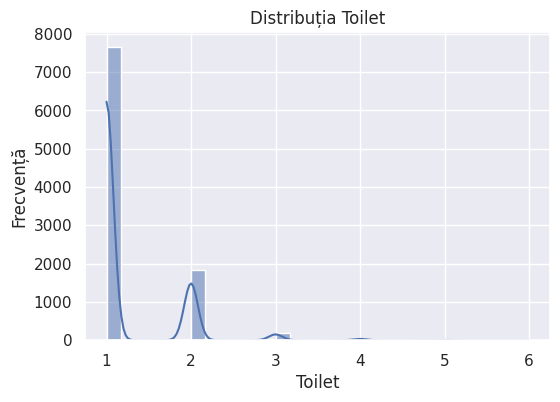

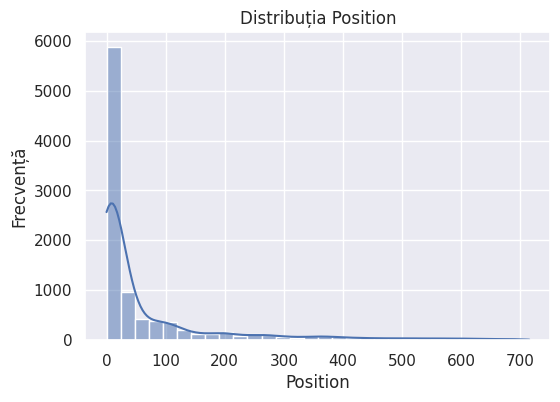

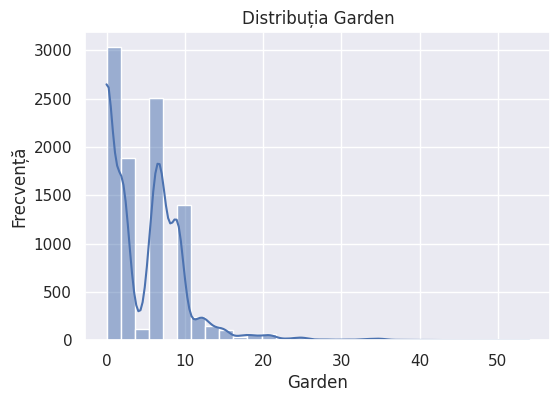

,Price,Lot size (m2),Build year,House type,Roof,Rooms,Toilet,Position,Garden
0,215000,101.0,1976.0,0,0,4.0,1.0,0,0
1,895000,140.0,1935.0,1,1,4.0,1.0,1,1
2,225000,97.0,1983.0,2,2,5.0,1.0,2,0
3,875000,129.0,2003.0,3,3,4.0,1.0,3,2
4,745000,167.0,1936.0,4,2,5.0,3.0,4,3


In [ ]:
df.drop(['Address'], axis = 1, inplace = True)
import matplotlib.pyplot as plt
import seaborn as sns

# Iterăm prin toate coloanele DataFrame-ului
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuția {col}')
    plt.xlabel(col)
    plt.ylabel('Frecvență')
    plt.show()

df.head()

In [ ]:
df = df.astype('float')
df['Price per m2'] = df['Price'] / df['Lot size (m2)']

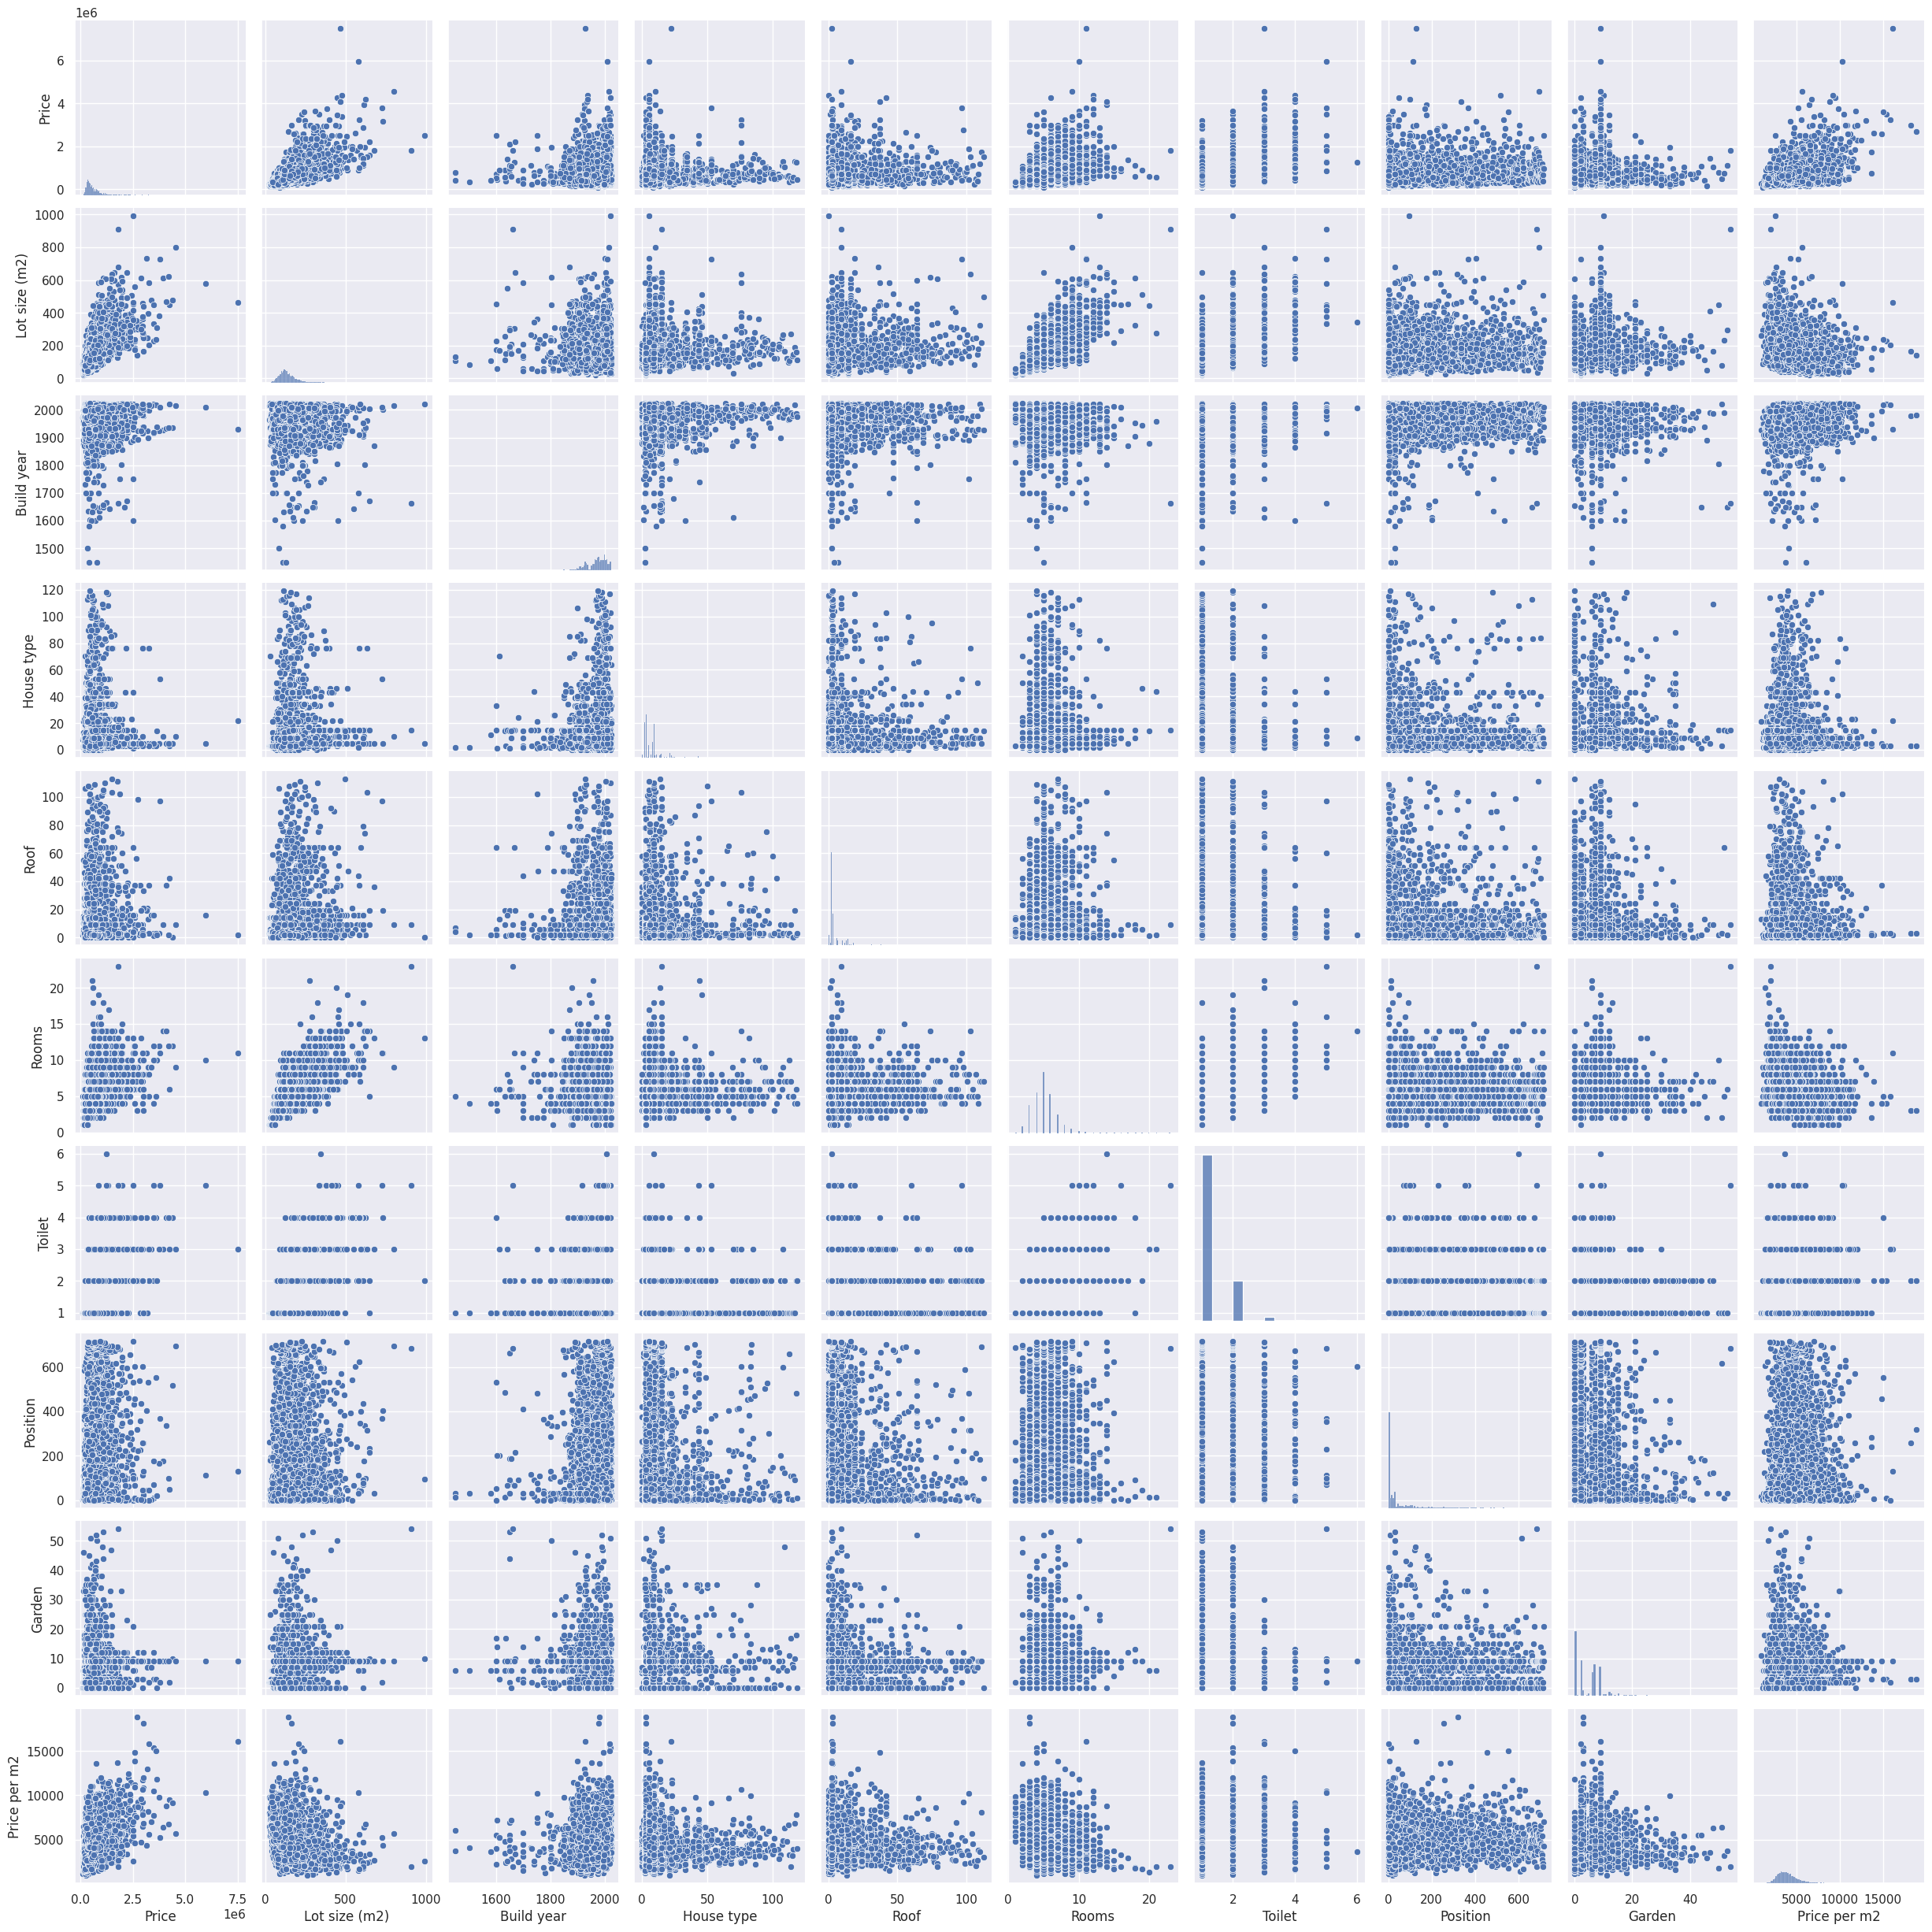

In [ ]:
sns.set(font_scale = 1)
sns.pairplot(df);

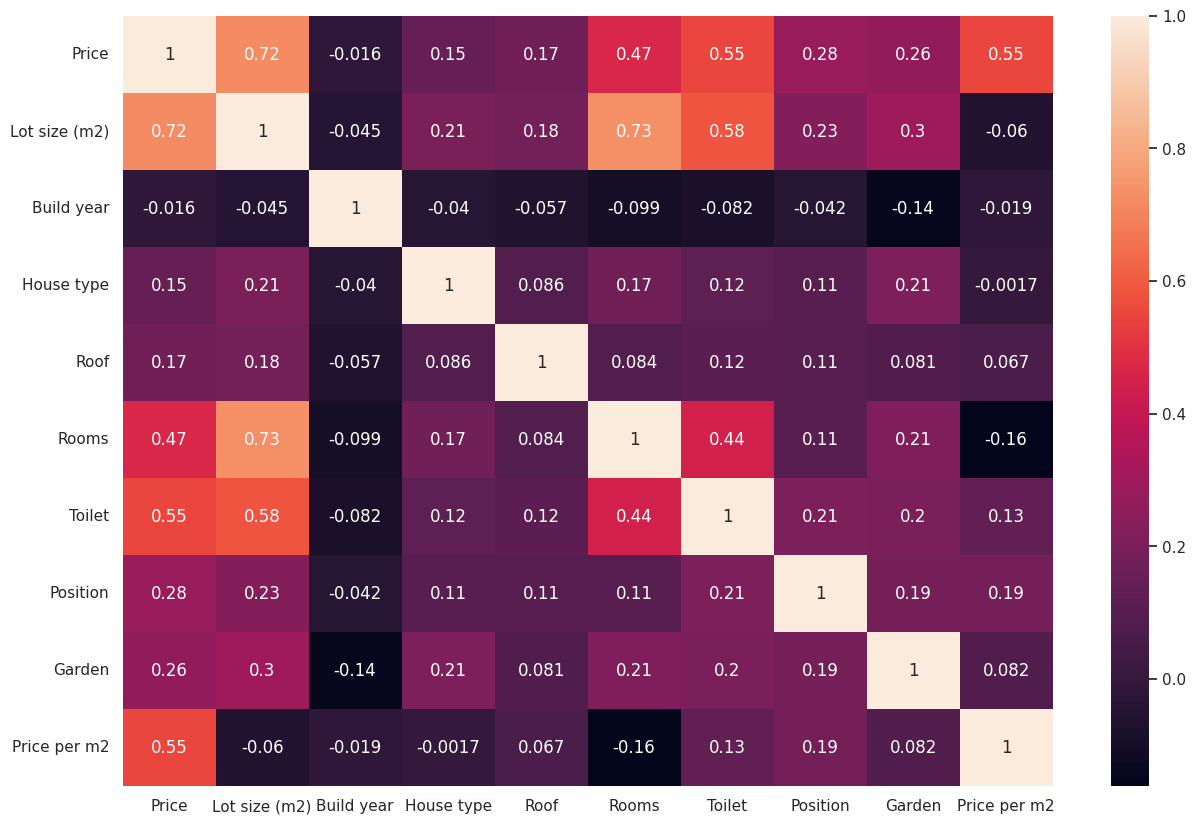

In [ ]:
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, ax=ax);

In [ ]:
df.corr().Price.sort_values(ascending = False)

,Price
Price,1.000000
Lot size (m2),0.721683
Price per m2,0.554822
Toilet,0.551580
Rooms,0.467140
Position,0.281525
Garden,0.260935
Roof,0.170131
House type,0.146798
Build year,-0.016483


In [ ]:
y = df['Price']
X_selected = df.drop('Price', axis=1)
# Selectează doar coloanele relevante
selected_columns = ['Living space size (m2)', 'Toilet', 'Rooms', 'Position', 'House type']

# Împărțirea setului de date în seturi de antrenare și testare
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

# Verifică structura noilor date
print(X_train.head())


      Lot size (m2)  Build year  House type  Roof  Rooms  Toilet  Position  \
9670          171.0      1941.0        10.0  21.0    5.0     1.0      16.0   
7902          178.0      1888.0         7.0   7.0    4.0     1.0     224.0   
6144          171.0      1922.0         7.0   9.0    7.0     2.0     202.0   
7168          128.0      1976.0         8.0  31.0    4.0     2.0     171.0   
6188          130.0      1973.0        83.0   3.0    4.0     1.0     511.0   

      Garden  Price per m2  
9670    10.0   6988.304094  
7902     9.0   5595.505618  
6144     0.0   4941.520468  
7168     7.0   5273.437500  
6188    15.0   5576.923077  


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Antrenare Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Metrici Linear Regression
lr_r2 = r2_score(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)
print(f"Linear Regression:\nR²: {lr_r2:.4f}, RMSE: {lr_rmse:.4f}, MAE: {lr_mae:.4f}\n")


Linear Regression:
R²: 0.8897, RMSE: 115248.8493, MAE: 62809.3125



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Antrenare Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Metrici Random Forest
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"Random Forest:\nR²: {rf_r2:.4f}, RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}\n")


Random Forest:
R²: 0.9936, RMSE: 27672.0742, MAE: 6958.9286



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Antrenare Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Metrici Gradient Boosting
gb_r2 = r2_score(y_test, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
gb_mae = mean_absolute_error(y_test, gb_preds)
print(f"Gradient Boosting:\nR²: {gb_r2:.4f}, RMSE: {gb_rmse:.4f}, MAE: {gb_mae:.4f}\n")


Gradient Boosting:
R²: 0.9946, RMSE: 25554.1047, MAE: 14256.5744



In [ ]:
from sklearn.neural_network import MLPRegressor

# Antrenare Neural Network
nn_model = MLPRegressor(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)
nn_preds = nn_model.predict(X_test)

# Metrici Neural Network
nn_r2 = r2_score(y_test, nn_preds)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_preds))
nn_mae = mean_absolute_error(y_test, nn_preds)
print(f"Neural Network:\nR²: {nn_r2:.4f}, RMSE: {nn_rmse:.4f}, MAE: {nn_mae:.4f}\n")


Neural Network:
R²: 0.8856, RMSE: 117358.8537, MAE: 62461.3550



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Antrenare model XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Prezicerea valorilor
xgb_preds = xgb_model.predict(X_test)

# Calcularea metricilor
r2_xgb = r2_score(y_test, xgb_preds)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_preds))
mae_xgb = mean_absolute_error(y_test, xgb_preds)

print(f"XGBoost:\nR²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}")


XGBoost:
R²: 0.9870, RMSE: 39517.5632, MAE: 11049.7286


In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Antrenare model LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Prezicerea valorilor
lgb_preds = lgb_model.predict(X_test)

# Calcularea metricilor
r2_lgb = r2_score(y_test, lgb_preds)
rmse_lgb = np.sqrt(mean_squared_error(y_test, lgb_preds))
mae_lgb = mean_absolute_error(y_test, lgb_preds)

print(f"LightGBM:\nR²: {r2_lgb:.4f}, RMSE: {rmse_lgb:.4f}, MAE: {mae_lgb:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 5835, number of used features: 9
[LightGBM] [Info] Start training from score 594834.267009
LightGBM:
R²: 0.9865, RMSE: 40312.0324, MAE: 11264.2350


In [ ]:
import pandas as pd

# Store results in a dictionary
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network', 'XGBoost'],
    'R²': [lr_r2, rf_r2, gb_r2, nn_r2, r2_xgb],
    'RMSE': [lr_rmse, rf_rmse, gb_rmse, nn_rmse, rmse_xgb],
    'MAE': [lr_mae, rf_mae, gb_mae, nn_mae, mae_xgb]
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the results by R² (descending) to show the best performing model
sorted_results_df = results_df.sort_values(by='R²', ascending=False)

# Display the sorted results
print(sorted_results_df)


               Model        R²           RMSE           MAE
2  Gradient Boosting  0.994577   25554.104704  14256.574395
1      Random Forest  0.993640   27672.074192   6958.928630
4            XGBoost  0.987031   39517.563241  11049.728631
0  Linear Regression  0.889690  115248.849293  62809.312506
3     Neural Network  0.885614  117358.853715  62461.355014


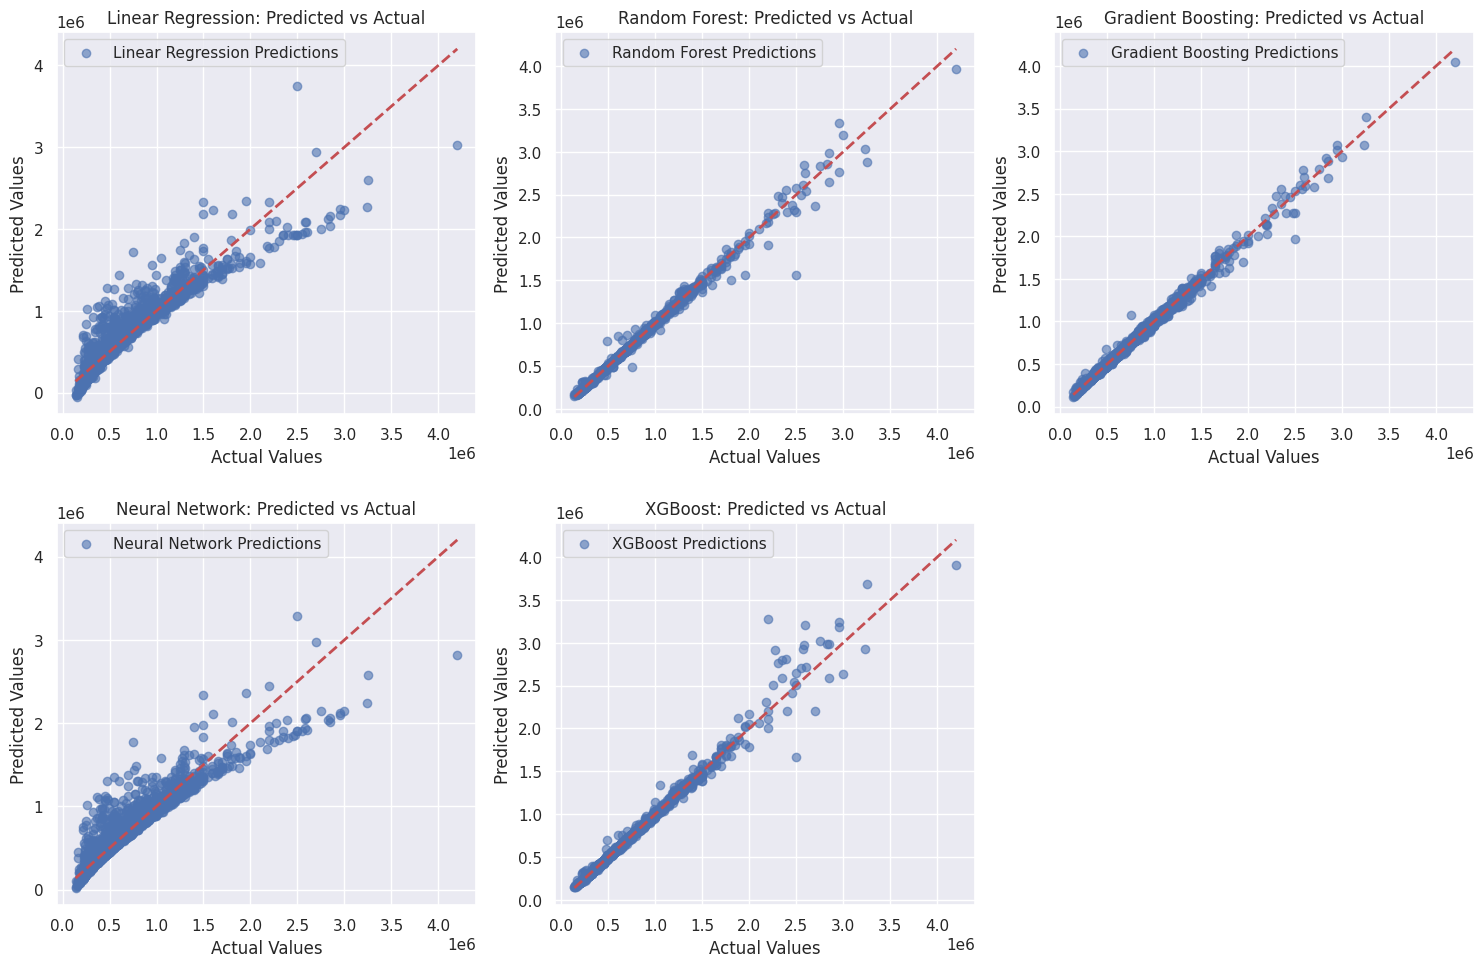

In [ ]:
import matplotlib.pyplot as plt

# List of models and their corresponding predictions
models = {
    'Linear Regression': lr_preds,
    'Random Forest': rf_preds,
    'Gradient Boosting': gb_preds,
    'Neural Network': nn_preds,
    'XGBoost': xgb_preds
}

# Plot for each model
plt.figure(figsize=(15, 10))

for i, (model_name, preds) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)  # Create a subplot grid with 2 rows and 3 columns
    plt.scatter(y_test, preds, alpha=0.6, label=f'{model_name} Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line (perfect prediction)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Exemplu de salvare a modelului
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
joblib.dump(model, 'gb_preds.pkl')  # Salvează modelu

['gb_preds.pkl']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

model = joblib.load('gb_preds.pkl')
print(type(model))  # Trebuie să afișeze <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
